In [1]:
using Random
using Distributions
using LinearAlgebra
using ForwardDiff
include("../Inversion/Plot.jl")
include("../Inversion/GMGD.jl")

visualization_2d (generic function with 1 method)

## Gaussian mixture

This is not an inverse problem!

$$
e^{-\Phi_r(\theta)} \propto \sum_i w_i \mathcal{N}(\theta; m_i, C_i) \\
\Phi_r(\theta) = - \log\Bigl( \sum_i w_i \mathcal{N}(\theta; m_i, C_i) \Bigr)
$$



In [2]:
function Gaussian_mixture(x, args)
    x_w, x_mean, inv_sqrt_x_cov = args
    # C = L L.T
    # C^-1 = L^-TL^-1
    N_x = size(x_mean, 2)
    ρ = 0
    for im = 1:length(x_w)
        ρ += x_w[im]*exp(-0.5*(x-x_mean[im,:])'*(inv_sqrt_x_cov[im]'*inv_sqrt_x_cov[im]*(x-x_mean[im,:])))/det(inv_sqrt_x_cov[im])
    end
    return log(ρ) - N_x/2*log(2*π)
end



function Gaussian_mixture_V(θ, args)
    return -Gaussian_mixture(θ, args), 
           -ForwardDiff.gradient(x -> Gaussian_mixture(x, args), θ), 
           -ForwardDiff.hessian(x -> Gaussian_mixture(x, args), θ)
end



Gaussian_mixture_V (generic function with 1 method)

[ Info: ("iter = ", 1, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.10051462130305702, -0.0030955485083633758], [-0.4654893745420042, 0.5030829693040125], [-0.3649747532389471, 0.4999874207956492])
[ Info: [-0.44367280051290103, 0.14032200771602796]
[ Info: ("iter = ", 2, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.10307145775078803, -0.007799946196180957], [-0.4560830210180175, 0.5023052770739007], [-0.3530115632672295, 0.49450533087771975])
[ Info: [-0.44021870291111137, 0.13534369708585786]
[ Info: ("iter = ", 3, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.10579016327621642, -0.012476252188814372], [-0.4465454814605369, 0.5019375409293025], [-0.3407553181843205, 0.48946128874048817])
[ Info: [-0.43696868860559823, 0.13037278349370515]
[ Info: ("iter = ", 4, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.10867195526109165, -0.017122213915099042], [-0.43682628994299305, 0.5020282179486273], [-0.3281543346819014, 0.48490600403352824])
[ Info:

[ Info: [-1.1383492323665902, -0.8245719900314008]
[ Info: ("iter = ", 30, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3182347744213481, 0.18835594571952752], [-0.29526019302380774, 0.3321365320432779], [0.022974581397540383, 0.5204924777628055])
[ Info: [-1.1630768155334192, -0.8569521479042365]
[ Info: ("iter = ", 31, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.33275883979720766, 0.20602305664669554], [-0.3421092432962038, 0.2700748074792795], [-0.00935040349899613, 0.476097864125975])
[ Info: [-1.181899624773466, -0.8825027275409058]
[ Info: ("iter = ", 32, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3436639102460437, 0.21906730570717925], [-0.37800267250223285, 0.22078897294796268], [-0.03433876225618915, 0.43985627865514193])
[ Info: [-1.1965134164051001, -0.9031572052095606]
[ Info: ("iter = ", 33, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3518967452842567, 0.22875828633302722], [-0.4059868547512691, 0.1807700026771666], [-0.05409

[ Info: [-1.2469385203528132, -1.0361852429300682]
[ Info: ("iter = ", 58, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3553939368495065, 0.23278181263182426], [-0.5021451779890416, -0.0802014896994974], [-0.14675124113953508, 0.15258032293232687])
[ Info: [-1.246113554700963, -1.0375451288806055]
[ Info: ("iter = ", 59, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3540254427496777, 0.23137821141948772], [-0.5004904845154869, -0.08290624264276537], [-0.14646504176580927, 0.14847196877672236])
[ Info: [-1.245253461998082, -1.0388235253056142]
[ Info: ("iter = ", 60, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3526629354393036, 0.22998833892738696], [-0.49876788813748557, -0.08545049569166269], [-0.14610495269818197, 0.14453784323572427])
[ Info: [-1.2443631483863307, -1.0400271347950825]
[ Info: ("iter = ", 61, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3513088771047995, 0.2286142470179332], [-0.49698695699251205, -0.08784740479799691], [-0

[ Info: [-1.219524937288763, -1.056594083533968]
[ Info: ("iter = ", 86, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3227268548775927, 0.20092294479101527], [-0.44762002377059057, -0.12107249870968911], [-0.1248931688929979, 0.07985044608132616])
[ Info: [-1.2185676137095784, -1.0569542470799342]
[ Info: ("iter = ", 87, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.32180817311579313, 0.2000671108128371], [-0.4457228859279981, -0.12180268495600526], [-0.12391471281220495, 0.07826442585683184])
[ Info: [-1.2176177435532387, -1.057301313178754]
[ Info: ("iter = ", 88, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3209050286729751, 0.19922747801556823], [-0.4438407551769187, -0.12250684977725522], [-0.12293572650394358, 0.07672062823831301])
[ Info: [-1.2166754996362579, -1.0576359101295436]
[ Info: ("iter = ", 89, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.32001712881504313, 0.19840365863042742], [-0.44197396112707166, -0.12318623290572057], [-

[ Info: [-1.195765968710881, -1.06319422338016]
[ Info: ("iter = ", 114, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.30196921815738603, 0.18196453192766268], [-0.40059585465680125, -0.13457756345006922], [-0.09862663649941522, 0.047386968477593466])
[ Info: [-1.1950341867998633, -1.063338224706826]
[ Info: ("iter = ", 115, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3013846132408818, 0.18144024884471358], [-0.399149191859284, -0.13487659412652972], [-0.09776457861840221, 0.046563654718183856])
[ Info: [-1.1943100095730341, -1.0634779874806164]
[ Info: ("iter = ", 116, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3008086721370529, 0.18092413878884656], [-0.39771765250304486, -0.1351671161310184], [-0.09690898036599194, 0.04575702265782816])
[ Info: [-1.193593368599165, -1.0636136485302268]
[ Info: ("iter = ", 117, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.30024121731297865, 0.18041601532276674], [-0.3963010981232737, -0.13544940096779273]

[ Info: [-1.1779163490420985, -1.0659761157820107]
[ Info: ("iter = ", 142, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.28837327819385805, 0.16985865781295195], [-0.3653343773219499, -0.14043353061819713], [-0.07696109912809185, 0.02942512719475482])
[ Info: [-1.1773704420483424, -1.0660387402482325]
[ Info: ("iter = ", 143, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2879764670602056, 0.1695073745200403], [-0.3642567867722316, -0.1405684627800144], [-0.07628031971202603, 0.028938911740025913])
[ Info: [-1.1768301568617086, -1.0660994618964643]
[ Info: ("iter = ", 144, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2875846890648735, 0.1691606160881413], [-0.36319034280879037, -0.14069953332822505], [-0.07560565374391687, 0.028461082759916267])
[ Info: [-1.1762954282494675, -1.0661583279119675]
[ Info: ("iter = ", 145, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2871978546645322, 0.16881829686458769], [-0.3621349152735162, -0.1408268365370472

[ Info: ("iter = ", 169, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.27919611400259337, 0.16174495551353119], [-0.3397953947971952, -0.14295344020375267], [-0.06059928079460186, 0.018791515309778517])
[ Info: [-1.1645562600873116, -1.0671394597915171]
[ Info: ("iter = ", 170, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.27890891807656504, 0.16149110731681982], [-0.33897711124552937, -0.14301028387299647], [-0.060068193168964334, 0.018480823443823347])
[ Info: [-1.1641453402009776, -1.0671627705267033]
[ Info: ("iter = ", 171, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2786249203926344, 0.1612400704766838], [-0.3381669417626158, -0.14306504556417488], [-0.05954202136998138, 0.018175024912508914])
[ Info: [-1.1637384722998123, -1.0671850885415395]
[ Info: ("iter = ", 172, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.27834407125145, 0.16099179980473052], [-0.3373647925125172, -0.14311776931937642], [-0.05902072126106722, 0.017874030485354103]

[ Info: ("mode ", 2, " mean residual ", [0.27243469390389324, 0.1557607494963294], [-0.32029544395276455, -0.14386967969363842], [-0.0478607500488713, 0.011891069802690973])
[ Info: [-1.1547573426215987, -1.067474793881686]
[ Info: ("iter = ", 197, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.27221893310961875, 0.1555693755184164], [-0.3196666022246111, -0.14388310988640537], [-0.04744766911499232, 0.011686265632011028])
[ Info: [-1.1544411027235117, -1.0674775029081347]
[ Info: ("iter = ", 198, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2720053162771045, 0.1553798681280635], [-0.3190437253279766, -0.14389534793738526], [-0.04703840905087209, 0.011484520190678249])
[ Info: [-1.154127846753666, -1.0674796501762684]
[ Info: ("iter = ", 199, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2717938136084193, 0.15519220104110135], [-0.31842674725346837, -0.14390641760787842], [-0.04663293364504906, 0.011285783433222923])
[ Info: [-1.1538175418711483, -1.067481

[ Info: [-1.1471770332363516, -1.0673805790408055]
[ Info: ("iter = ", 224, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.26711583954393475, 0.15103060519450645], [-0.30474249092899336, -0.14386391000472934], [-0.03762665138505861, 0.007166695189777111])
[ Info: [-1.1469309550275966, -1.0673715421741032]
[ Info: ("iter = ", 225, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.266950345154074, 0.15088293512291398], [-0.30425824624444475, -0.1438515446006755], [-0.03730790109037074, 0.007031390522238473])
[ Info: [-1.1466871044943416, -1.0673621842055714]
[ Info: ("iter = ", 226, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2667863251878959, 0.15073654641421275], [-0.3037784007819966, -0.14383849966067336], [-0.03699207559410067, 0.0068980467535393886])
[ Info: [-1.14644545819829, -1.0673525118080665]
[ Info: ("iter = ", 227, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.26662376093196377, 0.1505914228675469], [-0.30330290809997074, -0.1438247887925

[ Info: ("iter = ", 251, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2631149444285509, 0.14745003415800603], [-0.293085432135875, -0.14332725159079665], [-0.029970487707324134, 0.004122782567209382])
[ Info: [-1.141057540451598, -1.06702567530311]
[ Info: ("iter = ", 252, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.262983449685494, 0.1473319481153639], [-0.29270518008490864, -0.1433006537492308], [-0.02972173039941467, 0.004031294366133115])
[ Info: [-1.1408658277872414, -1.0670098036833575]
[ Info: ("iter = ", 253, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.26285301144220574, 0.14721478343131855], [-0.29232824944195746, -0.1432736679371344], [-0.029475237999751713, 0.003941115494184161])
[ Info: [-1.1406757815012372, -1.0669937574849393]
[ Info: ("iter = ", 254, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2627236171704835, 0.147098529367331], [-0.2919546064819139, -0.14324630243191233], [-0.029230989311430422, 0.0038522269354186733])
[ 

[ Info: ("mode ", 2, " mean residual ", [0.2599016331949322, 0.14455618478381926], [-0.28389216436106773, -0.14249476145353615], [-0.02399053116613553, 0.002061423330283113])
[ Info: [-1.1364200857453932, -1.0665462734852371]
[ Info: ("iter = ", 279, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25979473268016867, 0.14445961116039036], [-0.28359079546040644, -0.14246020643869967], [-0.02379606278023777, 0.0019994047216906896])
[ Info: [-1.1362679702618248, -1.0665268880809504]
[ Info: ("iter = ", 280, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2596886042999485, 0.1443637157145853], [-0.28329195883602776, -0.142425442324247], [-0.023603354536079257, 0.0019382733903383076])
[ Info: [-1.1361171266597303, -1.0665074132020176]
[ Info: ("iter = ", 281, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.259583239375708, 0.14426849103879633], [-0.28299562956451435, -0.14239047422505055], [-0.023412390188806365, 0.0018780168137457753])
[ Info: [-1.1359675424687008, -

[ Info: [-1.1327251540413117, -1.0659978327885924]
[ Info: ("iter = ", 306, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.257174002183237, 0.14208604495811708], [-0.27633460327901277, -0.14146323807630393], [-0.019160601095775776, 0.0006228068818131538])
[ Info: [-1.1326033680506182, -1.0659767657747228]
[ Info: ("iter = ", 307, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25708577738139643, 0.14200594798096505], [-0.2760955373507758, -0.1414244961709046], [-0.01900975996937937, 0.000581451810060446])
[ Info: [-1.1324825599357182, -1.065955661326448]
[ Info: ("iter = ", 308, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2569981192060646, 0.14192635380269084], [-0.2758583978010255, -0.14138565893457017], [-0.018860278594960922, 0.0005406948681206669])
[ Info: [-1.1323627203331814, -1.0659345209172733]
[ Info: ("iter = ", 309, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2569110215692695, 0.1418472572250007], [-0.2756231661363094, -0.141346729467

[ Info: ("iter = ", 333, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2549742345000604, 0.1400857396800963], [-0.270505078049316, -0.14039190763809273], [-0.015530843549255602, -0.00030616795799642826])
[ Info: [-1.1296559828783088, -1.0653981170963058]
[ Info: ("iter = ", 334, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2548993718548117, 0.14001756303121285], [-0.2703120563715703, -0.1403515322916628], [-0.01541268451675859, -0.0003339692604499567])
[ Info: [-1.129558333057236, -1.0653764782014135]
[ Info: ("iter = ", 335, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25482493474282714, 0.13994976851954666], [-0.27012052291554056, -0.14031112824109512], [-0.015295588172713426, -0.0003613597215484654])
[ Info: [-1.1294614320718601, -1.0653548341726875]
[ Info: ("iter = ", 336, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2547509187595411, 0.13988235236912472], [-0.2699304636529856, -0.14027069736715225], [-0.01517954489344453, -0.000388344998

[ Info: ("mode ", 2, " mean residual ", [0.25309027089425495, 0.13836877016362603], [-0.2657771700584462, -0.13929662064793757], [-0.012686899164191245, -0.0009278504843115432])
[ Info: [-1.1272628651963756, -1.0648143031682766]
[ Info: ("iter = ", 361, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2530254906927445, 0.13830970286561806], [-0.26561979134830865, -0.1392560360924033], [-0.012594300655564161, -0.0009463332267852509])
[ Info: [-1.1271831560722396, -1.0647927823477605]
[ Info: ("iter = ", 362, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25296103331059566, 0.13825092939092867], [-0.2654635671548724, -0.13921546270060642], [-0.012502533844276742, -0.0009645333096777453])
[ Info: [-1.1271040282885711, -1.064771274393493]
[ Info: ("iter = ", 363, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.252896895519885, 0.1381924469531157], [-0.26530848674826146, -0.13917490157390347], [-0.012411591228376484, -0.000982454620787776])
[ Info: [-1.12702547645686

[ Info: [-1.1252998844467625, -1.0642390085275122]
[ Info: ("iter = ", 388, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25138857803101, 0.13681741218887075], [-0.2617738611832437, -0.1381676510538097], [-0.010385283152233693, -0.0013502388649389574])
[ Info: [-1.1252341241725312, -1.0642179777487373]
[ Info: ("iter = ", 389, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2513317269888369, 0.1367656113961821], [-0.26164507448034036, -0.1381277281717892], [-0.010313347491503477, -0.0013621167756071029])
[ Info: [-1.1251688166296923, -1.0641969697072946]
[ Info: ("iter = ", 390, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25127512076277275, 0.1367140368067473], [-0.2615171780498974, -0.13808783982805983], [-0.010242057287124628, -0.0013738030213125418])
[ Info: [-1.1251039576684336, -1.0641759846560297]
[ Info: ("iter = ", 391, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.25121875699109564, 0.13666268636202747], [-0.26139016371477397, -0.1380479

[ Info: ("iter = ", 415, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.249933052674452, 0.1354925290921641], [-0.25858649908111453, -0.13710335179946043], [-0.008653446406662518, -0.0016108227072963166])
[ Info: [-1.1236169075632887, -1.063659442261485]
[ Info: ("iter = ", 416, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24988205330091942, 0.13544617266547826], [-0.2584790951447456, -0.13706453106548636], [-0.008597041843826175, -0.0016183584000080964])
[ Info: [-1.1235623771005305, -1.063639123800368]
[ Info: ("iter = ", 417, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.249831243228395, 0.1353999938092159], [-0.25837238598562284, -0.1370257564731433], [-0.008541142757227838, -0.001625762663927388])
[ Info: [-1.1235081969201783, -1.063618832952166]
[ Info: ("iter = ", 418, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24978062069719975, 0.13535399097210882], [-0.2582663652849595, -0.13698702830466358], [-0.008485744587759747, -0.00163303733255

[ Info: ("mode ", 2, " mean residual ", [0.24861768200562498, 0.13429896152862383], [-0.2559129790335641, -0.13607207047296682], [-0.007295297027939102, -0.0017731089443429882])
[ Info: [-1.122258739957457, -1.0631207705475096]
[ Info: ("iter = ", 443, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24857122778125718, 0.1342568987103535], [-0.25582228095493625, -0.13603457140748346], [-0.007251053173679078, -0.001777672697129945])
[ Info: [-1.1222126341657264, -1.06310122299856]
[ Info: ("iter = ", 444, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2485249213902985, 0.13421497669275537], [-0.2557321263846132, -0.13599712342880868], [-0.007207204994314681, -0.0017821467360533139])
[ Info: [-1.1221668025432436, -1.0630817046073835]
[ Info: ("iter = ", 445, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2484787615147102, 0.1341731942987073], [-0.255642510426643, -0.13595972662975453], [-0.007163748911932777, -0.0017865323310472248])
[ Info: [-1.1221212426257274,

[ Info: [-1.1211032960103218, -1.0626032299063186]
[ Info: ("iter = ", 470, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24736879734144912, 0.13317079937219917], [-0.2535637372032146, -0.13504161184919675], [-0.006194939861765503, -0.0018708124769975798])
[ Info: [-1.1210637914979344, -1.0625844690602286]
[ Info: ("iter = ", 471, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24732602684327715, 0.1331322703234801], [-0.2534865483373742, -0.13500556278200918], [-0.006160521494097071, -0.0018732924585290744])
[ Info: [-1.121024502096001, -1.0625657370955957]
[ Info: ("iter = ", 472, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24728337206434622, 0.13309385320076594], [-0.25340978187377, -0.13496956569021462], [-0.006126409809423777, -0.0018757124894486776])
[ Info: [-1.1209854258908827, -1.0625470339788408]
[ Info: ("iter = ", 473, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24724083202353306, 0.13305554711461748], [-0.25333343404791314, -0.1349

[ Info: ("iter = ", 497, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24625191224502235, 0.13216734620573378], [-0.25161747974150683, -0.13408641669457252], [-0.00536556749648448, -0.0019190704888387422])
[ Info: [-1.1200725609169364, -1.0620887091806397]
[ Info: ("iter = ", 498, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24621194982228964, 0.13213155107428648], [-0.2515504714507394, -0.134051755325971], [-0.005338521628449749, -0.0019202042516845153])
[ Info: [-1.1200384111774955, -1.0620707405768472]
[ Info: ("iter = ", 499, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2461720799103824, 0.13209584667906996], [-0.2514837953197366, -0.13401714444287074], [-0.005311715409354184, -0.0019212977638007889])
[ Info: [-1.1200044291777722, -1.0620527995062354]
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24613230176846307, 0.13206023233783962], [-0.25141744842384006, -0.13398258396163318], [-0.005285146655376993, -0.0019223

[ Info: ("mode ", 2, " mean residual ", [0.24520335855474507, 0.13123084118756748], [-0.24991674656853985, -0.13316801093516692], [-0.004713388013794784, -0.0019371697475994432])
[ Info: [-1.1192053143779979, -1.061613034814771]
[ Info: ("iter = ", 525, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24516565481152403, 0.13119727465593828], [-0.249857755272, -0.13313467936983162], [-0.0046921004604759675, -0.001937404713893337])
[ Info: [-1.1191752142322926, -1.0615957868860966]
[ Info: ("iter = ", 526, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24512802602679934, 0.13116378257229572], [-0.24979902600749948, -0.13310139558655854], [-0.004670999980700141, -0.0019376130142628178])
[ Info: [-1.1191452464858849, -1.0615785646907023]
[ Info: ("iter = ", 527, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24509047163923586, 0.1311303644109097], [-0.24974055650175445, -0.13306815947164263], [-0.004650084862518583, -0.0019377950607329386])
[ Info: [-1.119115409992

[ Info: [-1.1184359096639733, -1.061156161179396]
[ Info: ("iter = ", 552, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24417426016012672, 0.13031749500972636], [-0.24835700455939055, -0.13225240447125342], [-0.0041827443992638325, -0.0019349094615270512])
[ Info: [-1.118409011510348, -1.0611395825219587]
[ Info: ("iter = ", 553, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24413846057231303, 0.13028582969924946], [-0.24830455614630106, -0.13222036604590096], [-0.004166095573988032, -0.0019345363466514998])
[ Info: [-1.1183822182728014, -1.061123027622986]
[ Info: ("iter = ", 554, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2441027221954276, 0.13025422585179514], [-0.24825231348300184, -0.13218837203302614], [-0.0041495912875742225, -0.0019341461812310001])
[ Info: [-1.118355529060172, -1.0611064964086734]
[ Info: ("iter = ", 555, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24406704460692294, 0.1302226830641789], [-0.24820027481855889, -0.1

[ Info: ("iter = ", 579, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2432279912087285, 0.12948298898198374], [-0.24700826746028387, -0.13140258953344713], [-0.003780276251555359, -0.0019196005514633963])
[ Info: [-1.1177196620083627, -1.060700698849242]
[ Info: ("iter = ", 580, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24319370763937145, 0.12945285203712614], [-0.24696080469808376, -0.1313717062897942], [-0.00376709705871231, -0.0019188542526680508])
[ Info: [-1.1176953901982152, -1.06068475774276]
[ Info: ("iter = ", 581, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24315947523568943, 0.12942276688707094], [-0.24691350569548826, -0.13134086408049675], [-0.0037540304597988294, -0.0019180971934258106])
[ Info: [-1.1176712012361878, -1.0606688383574838]
[ Info: ("iter = ", 582, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24312529367510133, 0.12939273321811817], [-0.2468663690911629, -0.13131006278149943], [-0.0037410754160615844, -0.001917

[ Info: ("mode ", 2, " mean residual ", [0.24231940371879152, 0.1286866020465559], [-0.24578048309779535, -0.13058278571059637], [-0.003461079379003834, -0.0018961836640404572])
[ Info: [-1.117091501333674, -1.0602777086418476]
[ Info: ("iter = ", 607, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24228639715082492, 0.1286577613732761], [-0.24573699898536924, -0.13055296747158893], [-0.00345060183454432, -0.0018952060983128127])
[ Info: [-1.1170692430146232, -1.0602623296274643]
[ Info: ("iter = ", 608, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24225343406466093, 0.12862896495416107], [-0.2456936459848206, -0.1305231869971083], [-0.0034402119201596693, -0.00189422204294723])
[ Info: [-1.1170470510731088, -1.0602469704838196]
[ Info: ("iter = ", 609, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2422205142129455, 0.12860021254382384], [-0.2456504230376615, -0.13049344416997177], [-0.0034299088247159992, -0.0018932316261479343])
[ Info: [-1.1170249249750

[ Info: [-1.116512346246505, -1.0598692620117058]
[ Info: ("iter = ", 634, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24141089233743973, 0.1278950302771234], [-0.24460921296117774, -0.12976177315486992], [-0.00319832062373801, -0.001866742877746519])
[ Info: [-1.116491706351224, -1.0598543971564265]
[ Info: ("iter = ", 635, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24137901712816434, 0.12786734273270364], [-0.24456903024245186, -0.1297329691675135], [-0.0031900131142875154, -0.001865626434809864])
[ Info: [-1.1164711200221358, -1.0598395504826774]
[ Info: ("iter = ", 636, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24134717930438987, 0.12783969333472398], [-0.24452895242603567, -0.1297041997976543], [-0.0031817731216458034, -0.001864506462930321])
[ Info: [-1.1164505868437655, -1.0598247219312833]
[ Info: ("iter = ", 637, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24131537867726469, 0.12781208189175475], [-0.24448897869640665, -0.1296

[ Info: ("iter = ", 661, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24056286157170484, 0.12716032400599436], [-0.2435588419593075, -0.12899591056459905], [-0.0029959803876026536, -0.0018355865586046904])
[ Info: [-1.115953391425954, -1.0594597298848385]
[ Info: ("iter = ", 662, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24053193440803303, 0.1271336038218425], [-0.2435212262684921, -0.12896800490056007], [-0.00298929186045907, -0.0018344010787175735])
[ Info: [-1.115934106228067, -1.0594453525537857]
[ Info: ("iter = ", 663, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24050104010799897, 0.12710691715520428], [-0.24348369591773752, -0.1289401311091411], [-0.0029826558097385547, -0.0018332139539368186])
[ Info: [-1.1159148643055627, -1.059430991840712]
[ Info: ("iter = ", 664, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.24047017852509328, 0.12708026385435361], [-0.24344625027259745, -0.1289122890943925], [-0.0029760717475041665, -0.0018320

[ Info: ("mode ", 2, " mean residual ", [0.23973895738468412, 0.12645022136236883], [-0.24257141557734999, -0.12825337142341345], [-0.0028324581926658654, -0.0018031500610446172])
[ Info: [-1.1154469935258127, -1.0590772261564338]
[ Info: ("iter = ", 689, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23970886983422035, 0.12642435642822936], [-0.2425358976123107, -0.12822629383154713], [-0.002827027778090352, -0.0018019374033177715])
[ Info: [-1.115428772513798, -1.0590632798611286]
[ Info: ("iter = ", 690, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23967881162767432, 0.12639852132973592], [-0.24250044976434362, -0.1281992456639686], [-0.002821638136669302, -0.0018007243342326729])
[ Info: [-1.1154105870899442, -1.0590493488558104]
[ Info: ("iter = ", 691, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23964878265053396, 0.12637271594568653], [-0.24246507153954072, -0.12817222683559304], [-0.0028162888890067572, -0.0017995108899065138])
[ Info: [-1.115392

[ Info: [-1.1149668265985535, -1.058705912507594]
[ Info: ("iter = ", 716, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2389072427662908, 0.12573690328602072], [-0.24160188789514342, -0.1275060504007558], [-0.0026946451288526185, -0.0017691471147350812])
[ Info: [-1.1149494852608155, -1.0586923635647987]
[ Info: ("iter = ", 717, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23887793670369384, 0.12571183097626829], [-0.24156816058321617, -0.12747976578642908], [-0.0026902238795223354, -0.0017679348101607983])
[ Info: [-1.114932173522143, -1.0586788287485422]
[ Info: ("iter = ", 718, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23884865713276873, 0.12568678545153428], [-0.24153449114712908, -0.1274535083582575], [-0.0026858340143603443, -0.0017667229067232226])
[ Info: [-1.1149148911880646, -1.0586653080186863]
[ Info: ("iter = ", 719, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23881940396399043, 0.12566176661490144], [-0.24150087920549568, -0

[ Info: ("iter = ", 743, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23812502863054988, 0.1250690816351195], [-0.24071050810753913, -0.12680569619198784], [-0.0025854794769892553, -0.0017366145568683267])
[ Info: [-1.114491855359904, -1.0583317545008841]
[ Info: ("iter = ", 744, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23809640852990005, 0.1250447005847426], [-0.2406782192462403, -0.12678012044927872], [-0.002581810716340255, -0.0017354198645361252])
[ Info: [-1.114475274789514, -1.0583185865729852]
[ Info: ("iter = ", 745, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2380678127511526, 0.1250203439471124], [-0.24064597909906618, -0.1267545700004379], [-0.0025781663479135797, -0.001734226053325516])
[ Info: [-1.1144587189941, -1.0583054317212268]
[ Info: ("iter = ", 746, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2380392412229478, 0.1249960116433233], [-0.24061378736830516, -0.12672904478002325], [-0.002574546145357348, -0.0017330331366

[ Info: ("mode ", 2, " mean residual ", [0.23736062391513346, 0.12441914115133977], [-0.23985498222280446, -0.12612384331001514], [-0.002494358307671002, -0.001704702158675367])
[ Info: [-1.11405245882219, -1.057980711345879]
[ Info: ("iter = ", 771, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23733263705993615, 0.1243953931621166], [-0.23982391163536046, -0.12609892843239812], [-0.002491274575424307, -0.0017035352702815115])
[ Info: [-1.1140364981406874, -1.057967884751928]
[ Info: ("iter = ", 772, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23730467278772485, 0.12437166764466966], [-0.23979288260342882, -0.12607403718858684], [-0.002488209815703968, -0.0017023695439171843])
[ Info: [-1.114020558615379, -1.0579550703532465]
[ Info: ("iter = ", 773, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23727673104093344, 0.12434796453406034], [-0.2397618948940969, -0.12604916952117087], [-0.002485163853163469, -0.00170120498711053])
[ Info: [-1.114004640128498

[ Info: [-1.1136286195656706, -1.0576385876113321]
[ Info: ("iter = ", 798, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23658534837969875, 0.12376248792347141], [-0.23899999177089, -0.12543497776052953], [-0.002414643391191268, -0.0016724898370581165])
[ Info: [-1.1136131916917777, -1.0576260800592268]
[ Info: ("iter = ", 799, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23655797344916954, 0.12373934599924183], [-0.23897000317507058, -0.1254107038048776], [-0.0024120297259010437, -0.0016713578056357647])
[ Info: [-1.113597782138073, -1.057613583933296]
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23653061964315905, 0.12371622488681593], [-0.238940050344222, -0.12538645197535955], [-0.002409430701062948, -0.0016702270885436271])
[ Info: [-1.113582390812107, -1.057601099206984]
[ Info: ("iter = ", 801, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23650328691493694, 0.12369312453248292], [-0.23891013309720613, -0.125362

[ Info: ("iter = ", 827, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23579988873938795, 0.12309963341009415], [-0.23814421760592036, -0.12473983825930554], [-0.002344328866532408, -0.001640204849211388])
[ Info: [-1.1131733986640293, -1.0572682270721852]
[ Info: ("iter = ", 828, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23577310859116316, 0.12307707442956119], [-0.23811519817725943, -0.12471618641052062], [-0.0023420895860962743, -0.0016391119809594373])
[ Info: [-1.1131584833023855, -1.0572560512606322]
[ Info: ("iter = ", 829, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23574634833633742, 0.12305453483452544], [-0.23808620986045465, -0.12469255532315], [-0.0023398615241172205, -0.0016380204886245614])
[ Info: [-1.1131435838140848, -1.0572438861320785]
[ Info: ("iter = ", 830, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23571960793662317, 0.12303201458025162], [-0.23805725251527335, -0.12466894495332394], [-0.002337644578650183, -0.001

[ Info: ("mode ", 2, " mean residual ", [0.23508369952772964, 0.12249721894469552], [-0.23737122360691112, -0.12410840069415185], [-0.00228752407918148, -0.0016111817494563335])
[ Info: [-1.1127760581865218, -1.0569431645253387]
[ Info: ("iter = ", 855, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23505744375281182, 0.12247516841978624], [-0.2373429983483069, -0.12408529456965102], [-0.002285554595495093, -0.0016101261498647768])
[ Info: [-1.1127615481951063, -1.0569312693941721]
[ Info: ("iter = ", 856, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23503120691856624, 0.12245313616065429], [-0.23731480081122175, -0.12406220808887443], [-0.0022835938926555055, -0.0016090719282201432])
[ Info: [-1.1127470523606293, -1.0569193843616573]
[ Info: ("iter = ", 857, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23500498899266722, 0.12243112212907761], [-0.23728663088458596, -0.12403914121294954], [-0.0022816418919187342, -0.0016080190838719255])
[ Info: [-1.11273

[ Info: [-1.1123891009828843, -1.0566254828445785]
[ Info: ("iter = ", 882, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2343555952645831, 0.12188658768260327], [-0.23659104969085837, -0.12346873056741645], [-0.002235454426275263, -0.0015821428848131758])
[ Info: [-1.1123749548027029, -1.0566138535155685]
[ Info: ("iter = ", 883, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23432985820276064, 0.12186503481339826], [-0.23656356156389918, -0.12344616030919049], [-0.0022337033611385393, -0.0015811254957922294])
[ Info: [-1.1123608214154264, -1.0566022337680554]
[ Info: ("iter = ", 884, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23430413924343027, 0.12184349921460429], [-0.2365360983772499, -0.12342360866719572], [-0.0022319591338196276, -0.0015801094525914328])
[ Info: [-1.1123467007761991, -1.0565906235840332]
[ Info: ("iter = ", 885, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23427843835900547, 0.1218219808533255], [-0.2365086600431224, -0

[ Info: ("iter = ", 909, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2336669703508867, 0.12131062874362263], [-0.235857379672965, -0.12286576945863255], [-0.002190409322078285, -0.0015551407150099228])
[ Info: [-1.1119977039202746, -1.0563034259810706]
[ Info: ("iter = ", 910, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23364171278014603, 0.12128953109641386], [-0.23583053611827393, -0.12284369013719307], [-0.002188823338127893, -0.0015541590407792127])
[ Info: [-1.1119839001244984, -1.0562920583704376]
[ Info: ("iter = ", 911, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2336164726148352, 0.12126844988647087], [-0.23580371536820213, -0.12282162854859284], [-0.0021872427533669303, -0.0015531786621219706])
[ Info: [-1.1119701079941393, -1.056280699864728]
[ Info: ("iter = ", 912, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23359124983088936, 0.12124738508497553], [-0.2357769173522412, -0.12279958466191712], [-0.002185667521351853, -0.001552

[ Info: ("mode ", 2, " mean residual ", [0.23299105678034962, 0.12074667973315523], [-0.2351404112750476, -0.12227576365430709], [-0.0021493544946979692, -0.0015290839211518636])
[ Info: [-1.1116289961560515, -1.0559996505594849]
[ Info: ("iter = ", 937, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23296626102604415, 0.12072601615228079], [-0.23511416024227538, -0.122254152611125], [-0.002147899216231236, -0.001528136458844212])
[ Info: [-1.1116154955571917, -1.0559885233401267]
[ Info: ("iter = ", 938, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23294148206463325, 0.12070536827480799], [-0.2350879302919271, -0.12223255850663188], [-0.0021464482272938457, -0.0015271902318238911])
[ Info: [-1.1116020057500713, -1.0559774048146375]
[ Info: ("iter = ", 939, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23291671987479814, 0.12068473607519903], [-0.2350617213668671, -0.12221098131294618], [-0.0021450014920689486, -0.0015262452377471508])
[ Info: [-1.11158852

[ Info: [-1.111268186747674, -1.055702225962911]
[ Info: ("iter = ", 964, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23230305529323314, 0.12017395383905516], [-0.2344131728107032, -0.12167696798192754], [-0.0021101175174700615, -0.0015030141428723776])
[ Info: [-1.1112549679528112, -1.055691328573593]
[ Info: ("iter = ", 965, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23227872195945265, 0.12015372063983892], [-0.2343874918262912, -0.12165582100841238], [-0.0021087698668385557, -0.0015021003685734557])
[ Info: [-1.1112417592378352, -1.0556804395072616]
[ Info: ("iter = ", 966, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23225440485305132, 0.12013350246746275], [-0.23436183047547354, -0.12163469022994841], [-0.002107425622422221, -0.001501187762485659])
[ Info: [-1.111228560578986, -1.0556695587508689]
[ Info: ("iter = ", 967, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23223010395494273, 0.12011329929913922], [-0.23433618871181014, -0.12

[ Info: ("iter = ", 991, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23165169644766156, 0.11963286672365989], [-0.23372654737335616, -0.12111161190348482], [-0.0020748509256945935, -0.0014787451798249363])
[ Info: [-1.1109017961726801, -1.0554002033288223]
[ Info: ("iter = ", 992, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2316277947489333, 0.1196130314975042], [-0.23370138111495042, -0.12109089359330319], [-0.0020735863660171217, -0.0014778620957989902])
[ Info: [-1.110888851157867, -1.0553895341974193]
[ Info: ("iter = ", 993, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2316039087852312, 0.11959321071204788], [-0.23367623334426732, -0.1210701908266483], [-0.0020723245590361095, -0.0014769801146004152])
[ Info: [-1.1108759156168633, -1.0553788730403169]
[ Info: ("iter = ", 994, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.231580038539171, 0.11957340434667088], [-0.23365110402282815, -0.12104950358049778], [-0.002071065483657153, -0.00147

[ Info: ("iter = ", 29, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.1291681746421318, -0.0025461714994442514], [-0.6076714729953441, 0.07266458812882326], [-0.47850329835321226, 0.07011841662937901])
[ Info: [-0.2869369777834215, 0.1207789000468652]
[ Info: ("iter = ", 30, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.1301568113584239, -0.0032381437057422986], [-0.602167633885428, 0.07199912088416505], [-0.4720108225270041, 0.06876097717842275])
[ Info: [-0.28289810049559, 0.12020930299819918]
[ Info: ("iter = ", 31, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.1311514338651322, -0.0038840151708317214], [-0.5967796995736859, 0.0713406474801857], [-0.46562826570855376, 0.06745663230935398])
[ Info: [-0.27893145580763234, 0.11965344663555154]
[ Info: ("iter = ", 32, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.13215514656126692, -0.004482794766627933], [-0.59150472867458, 0.07068856137089952], [-0.4593495821133131, 0.06620576660427158])
[ Info:

[ Info: ("iter = ", 57, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.16571243336058164, -0.005895713237178114], [-0.48966667289931404, 0.055268888580148334], [-0.32395423953873237, 0.04937317534297022])
[ Info: [-0.19698324124698763, 0.10834032893753001]
[ Info: ("iter = ", 58, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.16753542724018236, -0.005560112808063421], [-0.48658603282555835, 0.05466213884555085], [-0.319050605585376, 0.04910202603748743])
[ Info: [-0.19452864398980194, 0.10797696556945943]
[ Info: ("iter = ", 59, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.16940116327079968, -0.005207895717787209], [-0.48356917841545044, 0.05405569728561305], [-0.31416801514465076, 0.04884780156782584])
[ Info: [-0.192119347423044, 0.10761644248483597]
[ Info: ("iter = ", 60, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.17130953700610332, -0.004840506871944608], [-0.48061500029072274, 0.05344964109298511], [-0.3093054632846194, 0.0486091342210405

[ Info: ("mode ", 2, " mean residual ", [0.22727098620811592, 0.005614413064019018], [-0.4260223549934663, 0.03936010354272207], [-0.19875136878535038, 0.04497451660674109])
[ Info: [-0.14529229784728925, 0.09923626426394196]
[ Info: ("iter = ", 85, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.22984531007734899, 0.0060337532231467955], [-0.4243343222247432, 0.03880819367982016], [-0.19448901214739422, 0.04484194690296696])
[ Info: [-0.14390521344066545, 0.0989203606953611]
[ Info: ("iter = ", 86, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23242217350873656, 0.006447638727985275], [-0.4226864317135464, 0.038260303962715264], [-0.19026425820480986, 0.04470794269070054])
[ Info: [-0.14255158238502671, 0.0986057479268259]
[ Info: ("iter = ", 87, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.23499973944953906, 0.006855822838719945], [-0.42107795941834425, 0.03771654481845124], [-0.1860782199688052, 0.04457236765717119])
[ Info: [-0.14123094937475208, 0.0982

[ Info: [-0.11824380091067527, 0.09115694235533875]
[ Info: ("iter = ", 112, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2957457387529083, 0.014845815840295085], [-0.3917465455217537, 0.025675186974956354], [-0.09600080676884537, 0.040521002815251436])
[ Info: [-0.11760035746277299, 0.09087585063895484]
[ Info: ("iter = ", 113, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.2979300066737073, 0.015072092115136784], [-0.39093926675298724, 0.02526007798979682], [-0.09300926007927995, 0.040332170104933604])
[ Info: [-0.1169783808381637, 0.09059608266237777]
[ Info: ("iter = ", 114, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.30009188403787773, 0.015291301138861853], [-0.39015544585694806, 0.024850182834356804], [-0.09006356181907033, 0.04014148397321866])
[ Info: [-0.11637747835300241, 0.09031764193600945]
[ Info: ("iter = ", 115, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.30223133714434314, 0.015503484541511962], [-0.3893946307976772, 0.024445

[ Info: ("iter = ", 139, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3472288120380105, 0.01860747150369241], [-0.3770173521473241, 0.01624476094229202], [-0.029788540109313644, 0.03485223244598443])
[ Info: [-0.10717652698117458, 0.08379935925187608]
[ Info: ("iter = ", 140, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.348867395841238, 0.018658993548883927], [-0.37671015150095266, 0.015963426475846504], [-0.02784275565971467, 0.03462242002473043])
[ Info: [-0.10700512872562258, 0.08355684483803075]
[ Info: ("iter = ", 141, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3504899198479239, 0.018704704059398256], [-0.37641713021608864, 0.015686689312908175], [-0.025927210368164755, 0.03439139337230643])
[ Info: [-0.10684643468567452, 0.08331577417732645]
[ Info: ("iter = ", 142, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.35209674520137163, 0.018744655226511298], [-0.3761380430540467, 0.015414522175986961], [-0.02404129785267506, 0.03415917740249

[ Info: ("mode ", 2, " mean residual ", [0.3868788367505129, 0.018142619082271823], [-0.373072633107796, 0.01018391810497224], [0.013806203642716897, 0.028326537187244063])
[ Info: [-0.10641689629573538, 0.07776983127731202]
[ Info: ("iter = ", 167, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.3882072781740058, 0.01806095496291103], [-0.3730767506186179, 0.010017326200364135], [0.015130527555387907, 0.028078281163275164])
[ Info: [-0.1065211765043208, 0.07756749348665787]
[ Info: ("iter = ", 168, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.38952874346777044, 0.017975559215608544], [-0.37309008382679226, 0.009854609963138972], [0.01643865964097818, 0.027830169178747515])
[ Info: [-0.10663350533516844, 0.07736665430152967]
[ Info: ("iter = ", 169, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.39084350383810396, 0.017886534975864093], [-0.37311250193829487, 0.009695741746959252], [0.017731001899809085, 0.027582276722823346])
[ Info: [-0.10675376325358452, 

[ Info: [-0.11175425814307907, 0.07281439508026445]
[ Info: ("iter = ", 194, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.42217109706681133, 0.01479282267551816], [-0.37629422846957333, 0.006888841445731486], [0.045876868597237996, 0.021681664121249646])
[ Info: [-0.11204130717223686, 0.07264991966699501]
[ Info: ("iter = ", 195, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4233815477130256, 0.014646549844067644], [-0.37651479499313556, 0.006819513130590704], [0.04686675271989005, 0.021466062974658348])
[ Info: [-0.11233400512302255, 0.0724866840189699]
[ Info: ("iter = ", 196, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.424589683684108, 0.014499421839166415], [-0.37674175575521646, 0.006753192437636252], [0.04784792792889153, 0.021252614276802667])
[ Info: [-0.112632286979461, 0.07232467269194107]
[ Info: ("iter = ", 197, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4257955605709, 0.014351525736494196], [-0.37697503319227976, 0.006689844972

[ Info: ("iter = ", 221, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.45410350977144476, 0.010764928195828832], [-0.38428208656129603, 0.00597019576223648], [0.06982142321014873, 0.016735123958065312])
[ Info: [-0.12173142950842021, 0.06862260881076351]
[ Info: ("iter = ", 222, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.45525515097783986, 0.01062064454367223], [-0.3846504457545226, 0.005969740641757704], [0.07060470522331724, 0.016590385185429934])
[ Info: [-0.12215468217939694, 0.06848635673130726]
[ Info: ("iter = ", 223, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4564042435705551, 0.010477208725437788], [-0.3850233645151603, 0.005971342814432817], [0.07138087905539481, 0.016448551539870605])
[ Info: [-0.12258203090454774, 0.06835084958454289]
[ Info: ("iter = ", 224, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.45755073436711263, 0.010334660513191748], [-0.38540078182475357, 0.005974967625000105], [0.07214995254235906, 0.01630962813819

[ Info: ("mode ", 2, " mean residual ", [0.48413181048711806, 0.0072629175812620045], [-0.3956544406071322, 0.006581470821533264], [0.08847736987998589, 0.013844388402795269])
[ Info: [-0.13445478241912193, 0.06515336113354053]
[ Info: ("iter = ", 249, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4851937458321816, 0.00715225503725786], [-0.39612525026143564, 0.006624889497738318], [0.08906849557074598, 0.013777144534996177])
[ Info: [-0.13497166897117402, 0.0650310862227205]
[ Info: ("iter = ", 250, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4862515063690182, 0.0070431550976359295], [-0.3965990582790837, 0.006669492417544137], [0.0896524480899345, 0.013712647515180067])
[ Info: [-0.13549136161585165, 0.06490909988749229]
[ Info: ("iter = ", 251, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.4873050344618024, 0.006935634019986307], [-0.39707580969146705, 0.006715250223733427], [0.09022922477033535, 0.013650884243719734])
[ Info: [-0.13601381408548943, 0

[ Info: ("iter = ", 271, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5074047875860245, 0.0051382597016498485], [-0.4071459367410855, 0.007829794322305017], [0.10025885084493896, 0.012968054023954866])
[ Info: [-0.14697222198746732, 0.0623888492223036]
[ Info: ("iter = ", 272, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5083575023791744, 0.005066974344149967], [-0.40767213060587565, 0.007893437170557627], [0.10068537177329878, 0.012960411514707594])
[ Info: [-0.14754215860447906, 0.062269687037836946]
[ Info: ("iter = ", 273, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5093049197400483, 0.004997536589514566], [-0.4082001059498928, 0.007957647984783545], [0.10110481379015551, 0.01295518457429811])
[ Info: [-0.14811386947829647, 0.062150506493211743]
[ Info: ("iter = ", 274, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.51024700117231, 0.0049299558656033735], [-0.4087298122040659, 0.00802240270745247], [0.10151718896824413, 0.01295235857305584

[ Info: ("mode ", 2, " mean residual ", [0.5311706700589788, 0.003887357126206012], [-0.4218342987404615, 0.009680837845292223], [0.10933637131851726, 0.013568194971498235])
[ Info: [-0.1628607242336646, 0.059133125435020535]
[ Info: ("iter = ", 299, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5319692421553588, 0.0038689075352407176], [-0.4223914730384313, 0.009751980724847453], [0.10957776911692751, 0.013620888260088171])
[ Info: [-0.16346402749540906, 0.059009733031685614]
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5327617591669506, 0.003852521033648519], [-0.42294914035324815, 0.00982311362116578], [0.10981261881370241, 0.013675634654814299])
[ Info: [-0.16406801339651989, 0.05888604875811265]
[ Info: ("iter = ", 301, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5335482032803825, 0.0038382045739921156], [-0.4235072562249246, 0.009894217750419015], [0.11004094705545797, 0.013732422324411131])
[ Info: [-0.16467264463012954, 

[ Info: [-0.17928477679501673, 0.055674944684562556]
[ Info: ("iter = ", 326, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5511963085155527, 0.004172558223973277], [-0.43748108162592286, 0.011610806084275782], [0.11371522688962982, 0.01578336430824906])
[ Info: [-0.17989415202641112, 0.05554083262219737]
[ Info: ("iter = ", 327, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5518206259421861, 0.004214373203300648], [-0.4380360916130903, 0.011675085151191478], [0.11378453432909574, 0.015889458354492125])
[ Info: [-0.18050329186174383, 0.05540621865489883]
[ Info: ("iter = ", 328, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5524386179761722, 0.0042584314623225344], [-0.4385904475006377, 0.01173888626224212], [0.11384817047553453, 0.015997317724564655])
[ Info: [-0.1811121660000879, 0.05527109584586547]
[ Info: ("iter = ", 329, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5530502831068346, 0.004304738923272065], [-0.4391441122411248, 0.0118021947

[ Info: ("iter = ", 353, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5658374661288824, 0.006105534330048873], [-0.45213345059745647, 0.01313761435147115], [0.11370401553142595, 0.019243148681520023])
[ Info: [-0.1961646852153128, 0.0517082701109576]
[ Info: ("iter = ", 354, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5662920020962074, 0.00620986820280111], [-0.4526586429794413, 0.013184165234303546], [0.11363335911676614, 0.019394033437104656])
[ Info: [-0.19675692183184104, 0.051557624028412616]
[ Info: ("iter = ", 355, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.566740355800004, 0.006316588844053957], [-0.45318228353261764, 0.013229881000861754], [0.1135580722673864, 0.01954646984491571])
[ Info: [-0.19734817967273593, 0.05140629742454765]
[ Info: ("iter = ", 356, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5671825398872179, 0.006425700743123507], [-0.4537043432427938, 0.013274749908448596], [0.1134781966444241, 0.019700450651572103])
[

Excessive output truncated after 524573 bytes.[ Info: ("mode ", 2, " mean residual ", [0.5759864054366604, 0.009771966824010665], [-0.4656896786956948, 0.014068732307720488], [0.11029672674096558, 0.023840699131731154])
[ Info: [-0.2117509082890196, 0.0473852681343008]
[ Info: ("iter = ", 381, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5762800399044633, 0.009942065967169247], [-0.46616372424104774, 0.014088898576784858], [0.11011631566341556, 0.024030964543954106])
[ Info: [-0.2123096815517525, 0.04721426658860654]
[ Info: ("iter = ", 382, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5765680242956132, 0.010114640999935087], [-0.4666355478445327, 0.014107946742435595], [0.10993247645108045, 0.024222587742370683])
[ Info: [-0.21286697141096347, 0.047042435437405626]
[ Info: ("iter = ", 383, " / ", 1000)
[ Info: ("mode ", 2, " mean residual ", [0.5768503860760423, 0.010289693676096494], [-0.467105129338803, 0.014125867667195646], [0.10974525673723934, 0.02441556134

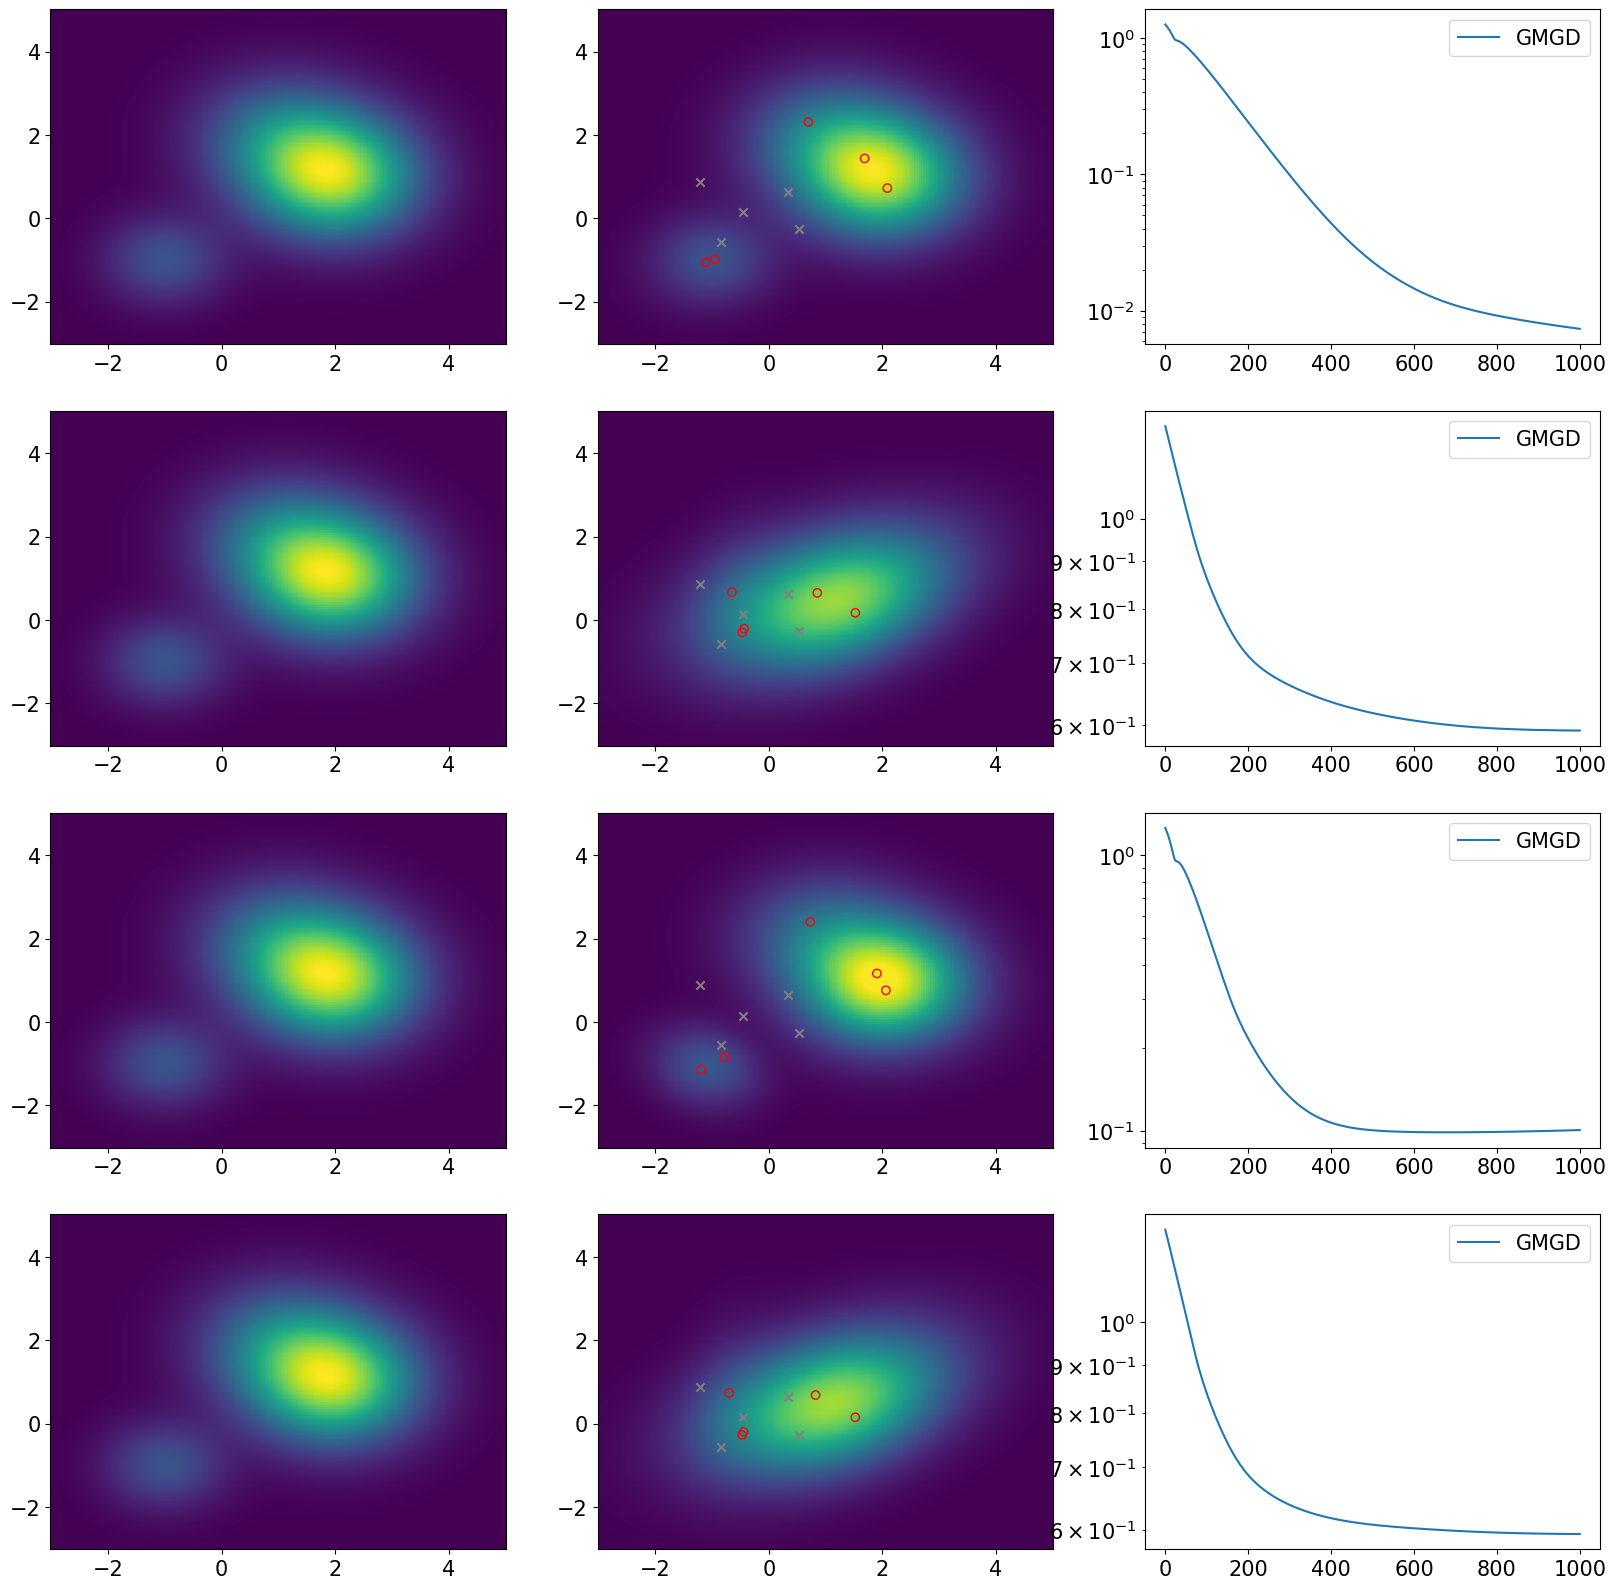

In [3]:
fig, ax = PyPlot.subplots(nrows=4, ncols=3, sharex=false, sharey=false, figsize=(20,20))

x_w_ref, x_mean_ref = [0.2;0.5;0.3], [1.0 2.0; 2.0 1.0; -1.0 -1.0]
N_modes_ref, N_x = size(x_mean_ref)
xx_cov_ref = zeros(N_modes_ref, 2, 2)
for im = 1:N_modes_ref
    xx_cov_ref[im,:,:] += I
end
xx_cov_ref[N_modes_ref,:,:] /= 2.0

inv_sqrt_x_cov_ref = [compute_sqrt_matrix(xx_cov_ref[im,:,:]; type="Cholesky")[2] for im = 1:N_modes_ref]
func_args = (x_w_ref, x_mean_ref, inv_sqrt_x_cov_ref)
func_dV(x) = Gaussian_mixture_V(x, func_args)
func_V(x) = -Gaussian_mixture(x, func_args)



Random.seed!(111);
N_modes = 5
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end


sqrt_matrix_type = "Cholesky"
N_iter , dt  = 1000, 0.01
T =  N_iter * dt
quadrature_test_list = [
    ("mean_point","mean_point"),
    ("cubature_transform_o3","cubature_transform_o3"),
    ("cubature_transform_o5","mean_point"),
    ("cubature_transform_o5","cubature_transform_o3")]
for iobs = 1:length(quadrature_test_list)
    quadrature_type_GM, quadrature_type = quadrature_test_list[iobs]
    gmgdobj = GMGD_Run(
            func_dV, 
            T,
            N_iter,
            # Initial condition
            x0_w, x0_mean, xx0_cov;
            sqrt_matrix_type = sqrt_matrix_type,
            # setup for Gaussian mixture part
            quadrature_type_GM = quadrature_type_GM,
            # setup for potential function part
            Bayesian_inverse_problem = false, 
            quadrature_type = quadrature_type)

    # Gaussian mixture test
    visualization_2d(ax[iobs,:]; Nx = 200, Ny = 200, x_lim=[-3.0, 5.0], y_lim=[-3.0, 5.0], func_V = func_V, objs=(gmgdobj,))

end


## Gaussian likelihood function

Consider the following inverse problem 

$$
\begin{align*}
y = 
A \theta
+\eta \quad (A = I)
\qquad 
y = 
\begin{bmatrix}
0.0\\
1.0
\end{bmatrix} 
\qquad
\Sigma_{\eta} = 
\sigma_\eta^2 I 
\end{align*} (\sigma_\eta = 0.3)
$$


We focus on the noninformative uniform prior, and hence we are sampling $e^{-\frac{1}{2}F^TF}$ with 

$$F(\theta) = \frac{y - A \theta}{\sigma_\eta}$$

     

## Circle shape likelihood function

Consider the following inverse problem 

$$
\begin{align*}
y = 
\theta^T A \theta
+\eta \quad (A = I)
\qquad 
y = 1
\qquad
\Sigma_{\eta} = 
\begin{bmatrix}
\sigma_\eta^2 
\end{bmatrix} 
\end{align*} (\sigma_\eta = 0.3)
$$


We focus on the noninformative uniform prior, and hence we are sampling $e^{-\frac{1}{2}F^TF}$ with 

$$F(\theta) = \frac{y - \theta^T A \theta}{\sigma_\eta}$$

     
     
## Banana shape likelihood function

Consider the following inverse problem 

$$
\begin{align*}
y = 
\begin{bmatrix}
\lambda(\theta_{(2)} -  \theta_{(1)}^2)\\
\theta_{(1)}
\end{bmatrix}
+\eta \quad (\lambda = 100)
\qquad 
y = 
\begin{bmatrix}
0\\
1
\end{bmatrix}
\qquad
\Sigma_{\eta} = 
\sigma_\eta^2 I \qquad (\sigma_\eta = 0.3)
\end{align*}
$$

We focus on the noninformative uniform prior, and hence we are sampling $e^{-\frac{1}{2}F^TF}$ with 
$$F(\theta) = 
\begin{bmatrix}
\frac{y_{(1)} - \lambda(\theta_{(2)} -  \theta_{(1)}^2)}{\sigma_\eta}\\
\frac{y_{(2)} - \theta_{(1)}}{\sigma_\eta}
\end{bmatrix}$$
     
     
## Double banana shape likelihood function

Consider the following inverse problem 

$$
\begin{align*}
y = 
\begin{bmatrix}
\log\Bigl(
\lambda(\theta_{(2)} -  \theta_{(1)}^2)^2 + (1 - \theta_{(1)})^2
\Bigr)\\ 
\theta_{(1)}\\ 
\theta_{(2)}
\end{bmatrix}
+ \eta \quad(\lambda = 100)
\qquad 
y = 
\begin{bmatrix}
\log(\lambda+1)\\
0\\
0
\end{bmatrix}
\qquad
\Sigma_{\eta} = 
\begin{bmatrix}
\sigma_\eta^2 & \\
& 1^2   \\
& & 1^2
\end{bmatrix}  
\end{align*}
$$

We essentially focus on the prior $\mathcal{N}(0,I)$, and we are sampling 
$e^{-\frac{1}{2}F^TF}$ 
with 
$$F(\theta) = 
\begin{bmatrix}
\frac{y_{(1)} - \log\Bigl(
\lambda(\theta_{(2)} -  \theta_{(1)}^2)^2 + (1 - \theta_{(1)})^2
\Bigr)}{\sigma_\eta}\\
y_{(2)} - \theta_{(1)}\\
y_{(3)} - \theta_{(2)}
\end{bmatrix}$$


## Gaussian mixture

This is not an inverse problem!

$$
e^{-\Phi_r(\theta)} \propto \sum_i w_i \mathcal{N}(\theta; m_i, C_i) \\
\Phi_r(\theta) = - \log\Bigl( \sum_i w_i \mathcal{N}(\theta; m_i, C_i) \Bigr)
$$

In [3]:
function G(θ, arg, Gtype = "Gaussian")
    if Gtype == "Gaussian"
        A = arg
        return A*θ
    elseif Gtype == "Circle"
        A = arg
        return [θ'A*θ]
    elseif Gtype == "Banana"
        λ = arg
        return [λ*(θ[2] - θ[1]^2); θ[1]]
    elseif Gtype == "Double_banana"
        λ = arg
        return [log( λ*(θ[2] - θ[1]^2)^2 + (1 - θ[1])^2 ); θ[1]; θ[2]]
    else
        print("Error in function G")
    end
end


function F(θ, args)
    y, ση, arg, Gtype = args
    Gθ = G(θ, arg, Gtype )
    return (y - Gθ) ./ ση
end

function info_F(Gtype)
    if Gtype == "Gaussian"
        N_θ, N_f = 2, 2
    elseif Gtype == "Circle"
        N_θ, N_f = 2, 1
    elseif Gtype == "Banana"
        N_θ, N_f = 2, 2
    elseif Gtype == "Double_banana"
        N_θ, N_f = 2, 3
    else
        print("Error in function G")
    end
    
    return N_θ, N_f
end


function logrho(θ, args)
    Fθ = F(θ, args)
    return -0.5*norm(Fθ)^2
end


function V(θ, args)
    return -logrho(θ, args), 
           -ForwardDiff.gradient(x -> logrho(x, args), θ), 
           -ForwardDiff.hessian(x -> logrho(x, args), θ)
end



V (generic function with 1 method)

In [86]:
function Gaussian_mixture_VI(func_V, func_F, w0, μ0, Σ0; N_iter = 100, dt = 1.0e-3)

    N_modes, N_θ = size(μ0)
    

    
    T =  N_iter * dt
    N_modes = 1
    x0_w = w0
    x0_mean = μ0
    xx0_cov = Σ0
    sqrt_matrix_type = "Cholesky"
    quadrature_type_GM = "cubature_transform_o5"
    
    objs = []

    if func_V !== nothing
#         gmgdobj = GMGD_Run(
#         func_V, 
#         T,
#         N_iter,
#         # Initial condition
#         x0_w, x0_mean, xx0_cov;
#         sqrt_matrix_type = sqrt_matrix_type,
#         # setup for Gaussian mixture part
#         quadrature_type_GM = quadrature_type_GM,
#         # setup for potential function part
#         Bayesian_inverse_problem = false, 
#         quadrature_type = "cubature_transform_o3")
        
        
        gmgdobj = GMGD_Run(
        func_V, 
        T,
        N_iter,
        # Initial condition
        x0_w, x0_mean, xx0_cov;
        sqrt_matrix_type = sqrt_matrix_type,
        # setup for Gaussian mixture part
        quadrature_type_GM = "mean_point",
        # setup for potential function part
        Bayesian_inverse_problem = false, 
        quadrature_type = "mean_point")
        
        push!(objs, gmgdobj)

    end

    if func_F !== nothing
        N_f = length(func_F(ones(N_θ)))
        gmgdobj_BIP = GMGD_Run(
        func_F, 
        T,
        N_iter,
        # Initial condition
        x0_w, x0_mean, xx0_cov;
        sqrt_matrix_type = sqrt_matrix_type,
        # setup for Gaussian mixture part
        quadrature_type_GM = "mean_point",
        # setup for potential function part
        Bayesian_inverse_problem = true, 
        N_f = N_f,
        quadrature_type = "unscented_transform",
        c_weight_BIP = 1.0e-3)
        
        push!(objs, gmgdobj_BIP)

    end

    return objs
end




Gaussian_mixture_VI (generic function with 1 method)

[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("iter = ", 700, " / ", 1000)
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("iter = ", 900, " / ", 1000)
[ Info: ("iter = ", 1000, " / ", 1000)
[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("iter = ", 700, " / ", 1000)
[ Info: ("iter = ", 800, " / ", 1000)
[ Info: ("iter = ", 900, " / ", 1000)
[ Info: ("iter = ", 1000, " / ", 1000)
[ Info: ("iter = ", 100, " / ", 1000)
[ Info: ("iter = ", 200, " / ", 1000)
[ Info: ("iter = ", 300, " / ", 1000)
[ Info: ("iter = ", 400, " / ", 1000)
[ Info: ("iter = ", 500, " / ", 1000)
[ Info: ("iter = ", 600, " / ", 1000)
[ Info: ("

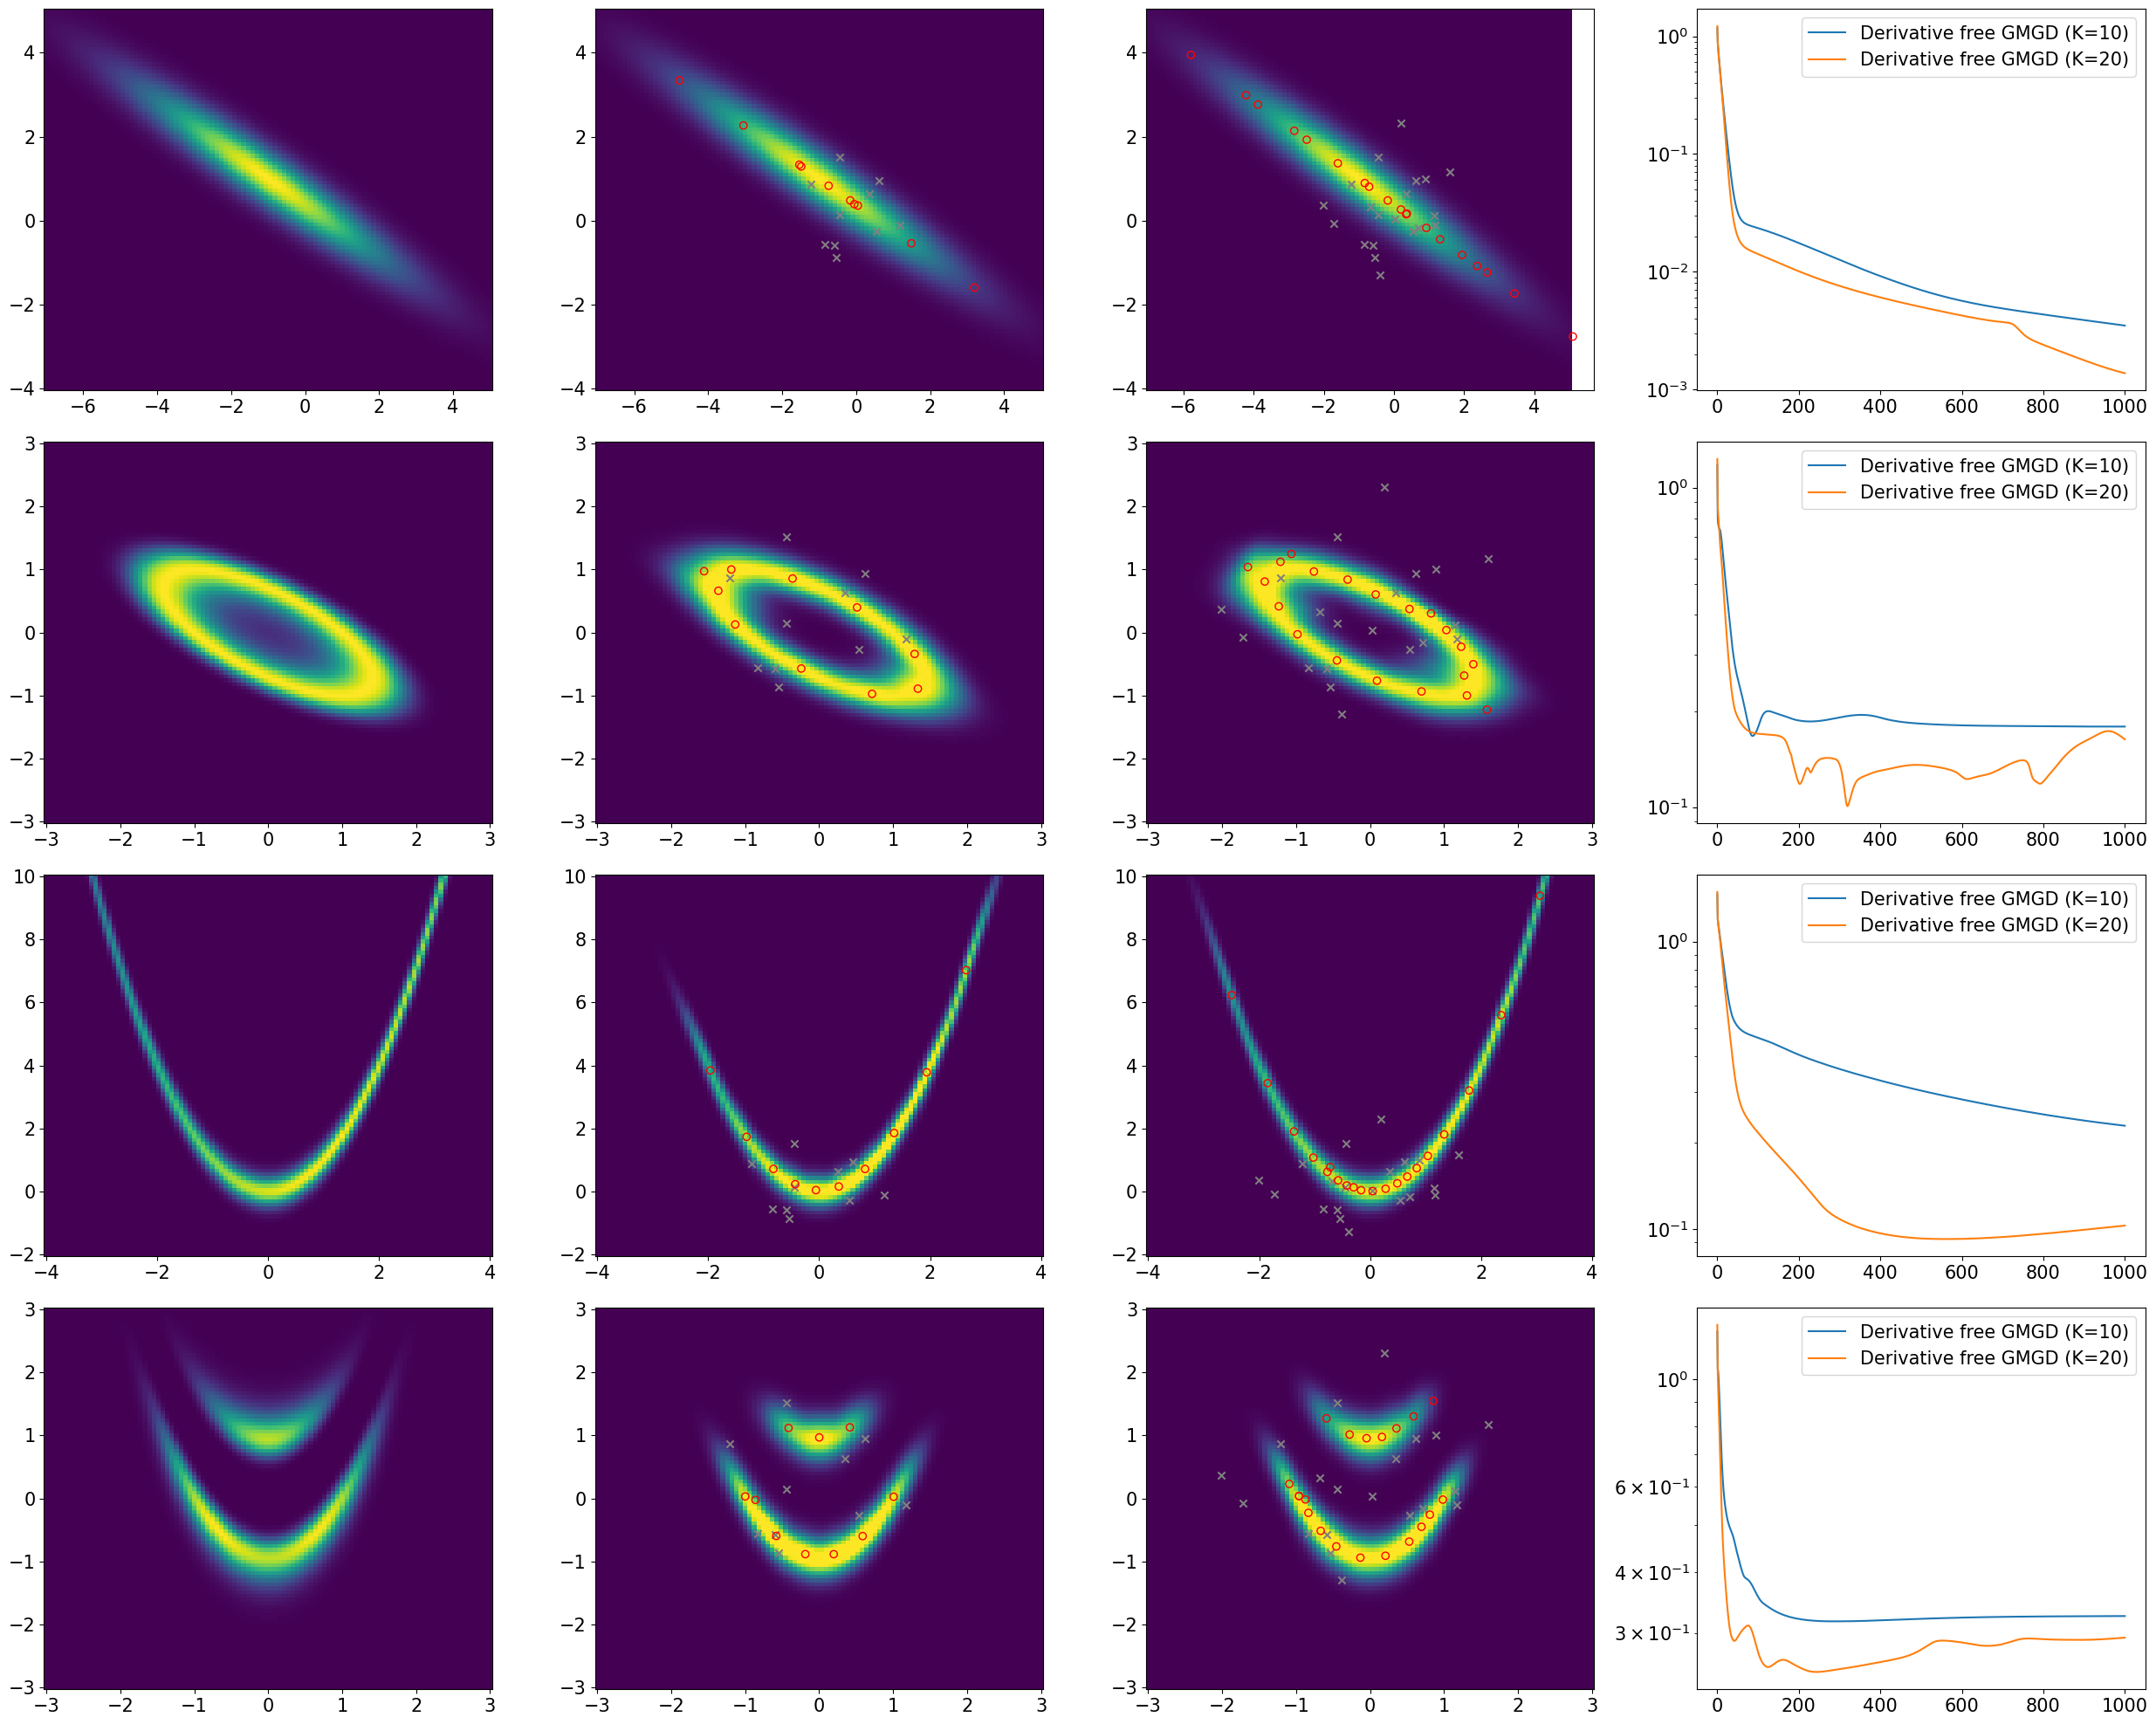

In [87]:
include("../Inversion/GMGD.jl")
fig, ax = PyPlot.subplots(nrows=4, ncols=4, sharex=false, sharey=false, figsize=(25,20))

    
Random.seed!(111);
N_modes = 20
x0_w  = ones(N_modes)/N_modes
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
N_x = length(μ0)
x0_mean, xx0_cov = zeros(N_modes, N_x), zeros(N_modes, N_x, N_x)
for im = 1:N_modes
    x0_mean[im, :]    .= rand(MvNormal(zeros(N_x), Σ0)) + μ0
    xx0_cov[im, :, :] .= Σ0
end




N_iter = 1000
Nx, Ny = 100,100
ση = 1.0
Gtype = "Gaussian"
A = [1.0 1.0; 1.0 2.0]
y = [0.0; 1.0]
func_args = (y, ση, A , Gtype)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
objs = (Gaussian_mixture_VI(nothing, func_F, x0_w[1:div(N_modes,2)], x0_mean[1:div(N_modes,2),:], xx0_cov[1:div(N_modes,2),:,:]; N_iter = N_iter, dt = 1e-1)[1],
        Gaussian_mixture_VI(nothing, func_F, x0_w, x0_mean, xx0_cov; N_iter = N_iter, dt = 1e-1)[1])
visualization_2d(ax[1,:]; Nx = Nx, Ny = Ny, x_lim=[-7.0, 5.0], y_lim=[-4.0, 5.0], func_F=func_F, objs=objs)



ση = 0.5
Gtype = "Circle"
A = [1.0 1.0; 1.0 2.0]
y = [1.0;]
func_args = (y, ση, A , Gtype)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
objs = (Gaussian_mixture_VI(nothing, func_F, x0_w[1:div(N_modes,2)], x0_mean[1:div(N_modes,2),:], xx0_cov[1:div(N_modes,2),:,:]; N_iter = N_iter, dt = 1e-1)[1],
        Gaussian_mixture_VI(nothing, func_F, x0_w, x0_mean, xx0_cov; N_iter = N_iter, dt = 1e-1)[1])
visualization_2d(ax[2,:]; Nx = Nx, Ny = Ny, x_lim=[-3.0, 3.0], y_lim=[-3.0, 3.0], func_F=func_F, objs=objs)



ση = sqrt(10.0)
Gtype = "Banana"
λ = 10.0
y = [0.0; 1.0]
func_args = (y, ση, λ , Gtype)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
μ0, Σ0 = [0.0; 0.0], [1.0 0.0; 0.0 1.0]
objs = (Gaussian_mixture_VI(nothing, func_F, x0_w[1:div(N_modes,2)], x0_mean[1:div(N_modes,2),:], xx0_cov[1:div(N_modes,2),:,:]; N_iter = N_iter, dt = 1e-1)[1],
        Gaussian_mixture_VI(nothing, func_F, x0_w, x0_mean, xx0_cov; N_iter = N_iter, dt = 1e-1)[1])
visualization_2d(ax[3,:]; Nx = Nx, Ny = Ny, x_lim=[-4.0, 4.0], y_lim=[-2.0, 10.0], func_F=func_F, objs=objs)



ση = [0.5; 1.0; 1.0]
Gtype = "Double_banana"
λ = 100.0
y = [log(λ+1); 0.0; 0.0]
func_args = (y, ση, λ , Gtype)
func_F(x) = F(x, func_args)
func_dV(x) = V(x, func_args)
objs = (Gaussian_mixture_VI(nothing, func_F, x0_w[1:div(N_modes,2)], x0_mean[1:div(N_modes,2),:], xx0_cov[1:div(N_modes,2),:,:]; N_iter = N_iter, dt = 1e-1)[1],
        Gaussian_mixture_VI(nothing, func_F, x0_w, x0_mean, xx0_cov; N_iter = N_iter, dt = 1e-1)[1])
visualization_2d(ax[4,:]; Nx = Nx, Ny = Ny, x_lim=[-3.0, 3.0], y_lim=[-3.0, 3.0], func_F=func_F, objs=objs)

fig.tight_layout()
fig.savefig("DFGMGD.pdf")